In [1]:
MAKE_BOOK_FIGURES=True

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,
        
        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout settings
        'figure.constrained_layout.use': True,
        
        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

# Credible Intervals

The posterior $p(\theta|x_{1:N})$ captures everything we say about $\theta$.
Credible intervals are a way to summarize it.
A credible interval is an interval inside which the parameter $\theta$ lies with high probability.
Specifically, a 95\% credible interval $(\ell, u)$ (for lower and upper bounds) for $\theta$ is such that:

$$
p(\ell \le \theta \le u|x_{1:N}) = 0.95.
$$

Of course, there is not a unique, credible interval.
You can move $(\ell, u)$ to the left or to the right in a way that keeps the probability contained in it at 0.95.

The *central credible interval* is particularly common.
It is defined by solving the following root-finding problems:

$$
p(\theta \le \ell | x_{1:N}) = 0.025,
$$

and

$$
p(\theta \le u | x_{1:N}) = 0.975,
$$

for $\ell$ and $u$, respectively.

Let's use a coin toss example to demonstrate this.

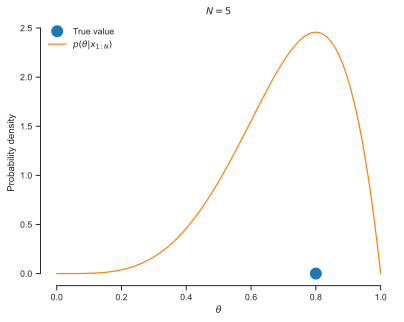

In [4]:
import scipy.stats as st

theta_true = 0.8
X = st.bernoulli(theta_true)

N = 5
data = X.rvs(size=N)

alpha = 1.0 + data.sum()
beta = 1.0 + N - data.sum()
Theta_post = st.beta(alpha, beta)

fig, ax = plt.subplots()
thetas = np.linspace(0, 1, 100)
ax.plot(
    [theta_true],
    [0.0],
    'o',
    markeredgewidth=2,
    markersize=10,
    label='True value')
ax.plot(
    thetas,
    Theta_post.pdf(thetas),
    label=r'$p(\theta|x_{1:N})$'
)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Probability density')
ax.set_title('$N={0:d}$'.format(N))
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

Here is how you can find the credible interval with the help of ``scipy.stats``:

In [5]:
theta_low = Theta_post.ppf(0.025)
theta_up = Theta_post.ppf(0.975)
print(f'Theta is in [{theta_low:.2f}, {theta_up:1.2f}] with 95% probability')

Theta is in [0.36, 0.96] with 95% probability


Let's visualize the credible interval:

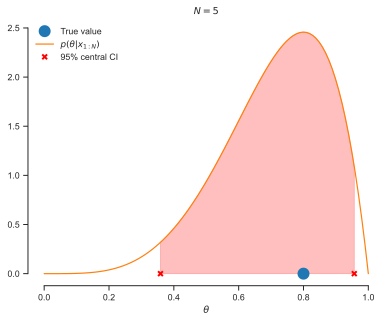

In [6]:
fig, ax = plt.subplots()
ax.plot(
    [theta_true],
    [0.0],
    'o',
    markeredgewidth=2,
    markersize=10,
    label='True value'
)
ax.plot(
    thetas,
    Theta_post.pdf(thetas),
    label=r'$p(\theta|x_{1:N})$'
)
thetas_int = np.linspace(theta_low, theta_up, 100)
ax.fill_between(
    thetas_int,
    np.zeros(thetas_int.shape),
    Theta_post.pdf(thetas_int),
    color='red',
    alpha=0.25
)
ax.plot(
    [theta_low, theta_up],
    np.zeros((2,)),
    'x',
    color='red',
    markeredgewidth=2,
    label='95% central CI'
)
ax.set_xlabel(r'$\theta$')
ax.set_title(f'$N={N}$')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

So, is there another 95\% credible interval?
Yes there is. You can find it by solving thes problem:

$$
p(\theta \le \ell | x_{1:N}) = 0.01,
$$

and

$$
p(\theta \le u | x_{1:N}) = 0.96,
$$

for $\ell$ and $u$, respectively.
Here is what you will find for the coin toss example.

In [7]:
theta_low_o = Theta_post.ppf(0.01)
theta_up_o = Theta_post.ppf(0.96)
print(f'Theta is in [{theta_low_o:.2f}, {theta_up_o:1.2f}] with 95% probability')

Theta is in [0.29, 0.94] with 95% probability


And here is how it compares to the previous one:

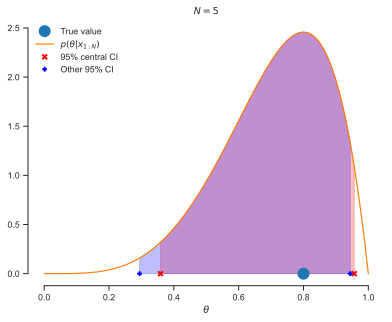

In [9]:
fig, ax = plt.subplots()
ax.plot(
    [theta_true],
    [0.0],
    'o',
    markeredgewidth=2,
    markersize=10,
    label='True value'
)
ax.plot(
    thetas,
    Theta_post.pdf(thetas),
    label=r'$p(\theta|x_{1:N})$'
)
thetas_int = np.linspace(theta_low, theta_up, 100)
ax.fill_between(
    thetas_int,
    np.zeros(thetas_int.shape),
    Theta_post.pdf(thetas_int),
    color='red',
    alpha=0.25
)
ax.plot(
    [theta_low, theta_up],
    np.zeros((2,)),
    'x',
    color='red', 
    markeredgewidth=2,
    label='95% central CI'
)
thetas_int_o = np.linspace(theta_low_o, theta_up_o, 100)
ax.fill_between(
    thetas_int_o,
    np.zeros(thetas_int_o.shape),
    Theta_post.pdf(thetas_int_o),
    color='blue',
    alpha=0.25
)
ax.plot(
    [theta_low_o, theta_up_o],
    np.zeros((2,)),
    '+',
    color='blue',
    markeredgewidth=2,
    label='Other 95% CI'
)
ax.set_xlabel(r'$\theta$')
ax.set_title(f'$N={N:d}$')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

## Getting Credible Intervals when the Posterior is not Analytically Available
Of course, you often do not have the posterior in analytical form and have to estimate the credible intervals via sampling.
We will learned about this in [Lecture 10](predictive-quantiles).

## Questions
+ Find the credible interval for $\theta$ conditioned on the data with 99\% accuracy.
+ How many coin tosses do you have to do to estimate $\theta$ within an accuracy of $1\%$ with $99\%$ probability? Do not try to do this analytically. Just experiment with different values of $N$ for this synthetic example. Getting a number $N$ that works for all possible datasets (assuming the model is correct) is an exciting but not trivial problem.